In [91]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [92]:
injury_file = Path("Resources/injury_data.csv")
injury_df = pd.read_csv(injury_file)
injury_df.head()

,Playerid,Height,Weight,Season,Side,Body Part,Part Specific,Injury Type,Surgery?,Time of Year,Total Regular Season Games Missed,Total Playoff Games Missed
0,Player1,"6'9""",225,2005-06,NaN,head,jaw,fracture,Yes,Regular season,10.0,0
1,Player1,"6'9""",225,2006-07,NaN,NaN,NaN,illness,No,Regular season,1.0,0
2,Player1,"6'9""",225,2006-07,R,knee,NaN,soreness,No,Regular season,1.0,0
3,Player1,"6'9""",225,2007-08,R,knee,NaN,effusion,No,Regular season,10.0,0
4,Player1,"6'9""",225,2007-08,R,knee,NaN,debridement,Yes,Regular season,65.0,0


In [93]:
#
NA_injury_df = injury_df.drop(columns=["Height",
                                       "Playerid",
                                       "Weight",
                                       "Season",
                                       "Surgery?", 
                                       "Time of Year",
                                       "Total  Regular Season Games Missed",
                                       "Total Playoff Games Missed"])

NA_injury_df.head()

,Side,Body Part,Part Specific,Injury Type
0,NaN,head,jaw,fracture
1,NaN,NaN,NaN,illness
2,R,knee,NaN,soreness
3,R,knee,NaN,effusion
4,R,knee,NaN,debridement


In [94]:
NA_injury_df.dtypes

Side             object
Body Part        object
Part Specific    object
Injury Type      object
dtype: object

In [95]:
# Focusing on injuries by location in the body, so excluding illnesses and therefore NaNs
NA_injury_count = NA_injury_df["Body Part"].value_counts()
NA_injury_count

Body Part
ankle          4602
leg            4393
knee           4043
back           2134
foot           1768
hand           1330
head           1222
shoulder        985
hip             768
wrist           605
elbow           422
neck            271
abdominal       201
rib             184
mouth           167
eye             136
arm              85
chest            84
body             30
pelvis           12
nerve             6
undisclosed       4
muscle            2
side              2
skin              2
ear               1
heel              1
trunk             1
Name: count, dtype: int64

In [96]:
NA_total_injury = NA_injury_count.sum()
print(f"The total number of injuries since 2005 in the NBA is {NA_total_injury}.")

# Choosing to exclude injuries with less occurances than 0.25% of all injuries
NA_injury_limit = 0.0025 * NA_total_injury
print(f"Any injury with less than {NA_injury_limit} occurances will be considered negligible.")

The total number of injuries since 2005 in the NBA is 23461.
Any injury with less than 58.6525 occurances will be considered negligible.


In [97]:
NA_injury_count_filtered = NA_injury_count[NA_injury_count>NA_injury_limit]
NA_injury_count_filtered

Body Part
ankle        4602
leg          4393
knee         4043
back         2134
foot         1768
hand         1330
head         1222
shoulder      985
hip           768
wrist         605
elbow         422
neck          271
abdominal     201
rib           184
mouth         167
eye           136
arm            85
chest          84
Name: count, dtype: int64

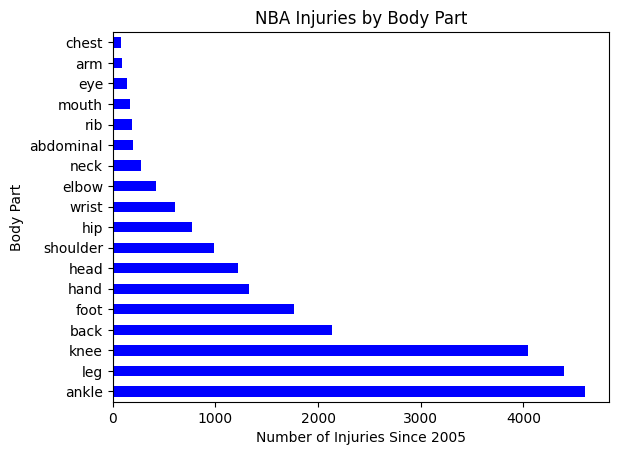

In [98]:
NA_body_part_bar = NA_injury_count_filtered.plot.barh(color='b')  
plt.title("NBA Injuries by Body Part")
plt.xlabel("Number of Injuries Since 2005")
plt.ylabel("Body Part")
plt.show()

In [99]:
NA_unique_injury_types = NA_injury_df['Injury Type'].unique()
NA_unique_injury_types

array(['fracture', 'illness', 'soreness', 'effusion', 'debridement',
       'contusion', 'spasms', 'strain', 'sprain', 'tendinitis',
       'concussion', 'tightness', 'injury', 'laceration', 'pain',
       'cartilage tear', 'hyperextension', 'stiffness', 'aggravation',
       'tendinosis', 'ligament tear', 'abrasion', 'tendon tear',
       'inflammation', 'bone contusion', 'swelling', 'dislocation',
       'impingement', 'stress reaction', 'displacement', 'stinger',
       ' contusion', 'blister', 'subluxation', 'tissue tear', 'surgery',
       'stress fracture', 'stress syndrome', 'disc herniation',
       'muscle tear', 'tooth', 'cramp', 'bursitis', 'recovery', 'tumor',
       'arthritis', 'tendinopathy', 'tear', 'plexopathy', 'infection',
       'irritation', 'neuritis', 'cartilage injury', 'rupture', 'edema',
       'epicondylitis', 'infarction', 'blood clot', 'nerve contusion',
       'arthroscopy', 'hernia', 'hyperflexion', 'weakness', 'tendonosis',
       'cyst', 'Illness', 'syn

In [100]:
# Including illnesses
NA_injury_type_count = NA_injury_df["Injury Type"].value_counts()
NA_injury_type_count

Injury Type
sprain           5543
soreness         5185
illness          4117
contusion        3128
strain           2972
                 ... 
extraction          1
stress injury       1
instability         1
neuroma             1
tendonopathy        1
Name: count, Length: 95, dtype: int64

In [101]:
NA_total_injury_type = NA_injury_type_count.sum()
print(f"The total number of injuries since 2005 in the NBA is {NA_total_injury_type}.")

# Choosing to exclude injuries with less occurances than 0.25% of all injuries
NA_injury_type_limit = 0.0025 * NA_total_injury_type
print(f"Any injury with less than {NA_injury_type_limit} occurances will be considered negligible.")

The total number of injuries since 2005 in the NBA is 27558.
Any injury with less than 68.895 occurances will be considered negligible.


In [102]:
NA_injury_type_count_filtered = NA_injury_type_count[NA_injury_type_count>NA_injury_type_limit]
NA_injury_type_count_filtered

Injury Type
sprain             5543
soreness           5185
illness            4117
contusion          3128
strain             2972
spasms              660
fracture            601
laceration          502
injury              499
tightness           467
tendinitis          428
bone contusion      410
inflammation        372
concussion          363
cartilage tear      206
ligament tear       191
dislocation         177
hyperextension      139
debridement         107
effusion            107
stiffness            98
tendon tear          93
pain                 81
surgery              81
abrasion             75
stress fracture      72
Name: count, dtype: int64

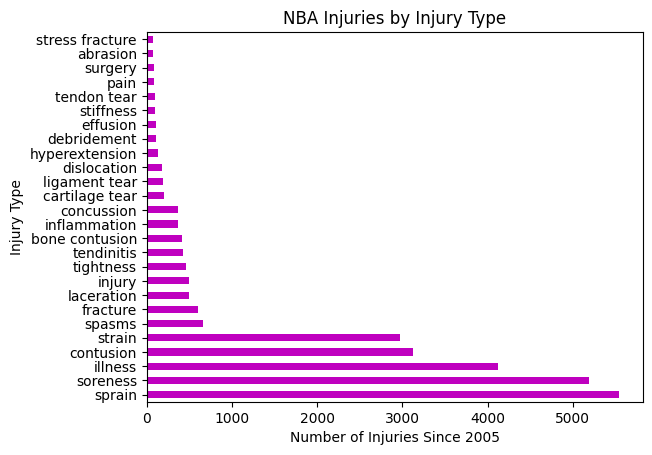

In [103]:
NA_injury_type_bar = NA_injury_type_count_filtered.plot.barh(color='m')  
plt.title("NBA Injuries by Injury Type")
plt.xlabel("Number of Injuries Since 2005")
plt.ylabel("Injury Type")
plt.show()

In [104]:
NA_ankle_injury_df = NA_injury_df[NA_injury_df["Body Part"].str.contains("ankle")==True]

NA_ankle_injury_count = NA_ankle_injury_df["Injury Type"].value_counts()

NA_total_ankle_injury = NA_ankle_injury_count.sum()
NA_ankle_injury_limit = 0.0025 * NA_total_ankle_injury

NA_ankle_injury_count_filtered = NA_ankle_injury_count[NA_ankle_injury_count>NA_ankle_injury_limit]
NA_ankle_injury_count_filtered

Injury Type
sprain            3690
soreness           686
contusion           26
strain              22
bone contusion      19
debridement         19
inflammation        18
impingement         17
injury              15
fracture            15
tendinitis          15
Name: count, dtype: int64

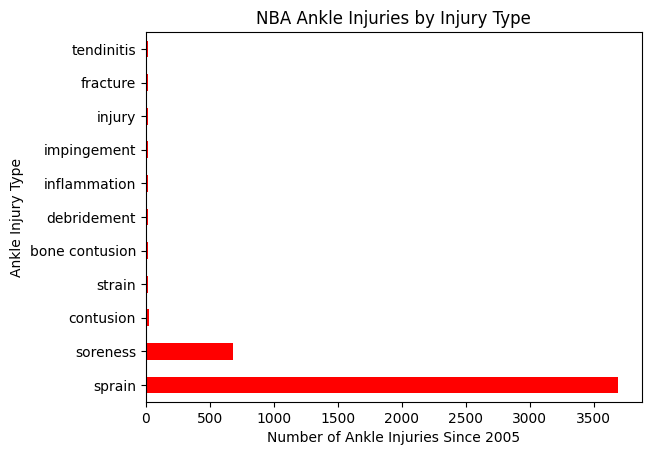

In [105]:
NA_ankle_injury_bar = NA_ankle_injury_count_filtered.plot.barh(color='r')  
plt.title("NBA Ankle Injuries by Injury Type")
plt.xlabel("Number of Ankle Injuries Since 2005")
plt.ylabel("Ankle Injury Type")
plt.show()

In [106]:
NA_leg_injury_df = NA_injury_df[NA_injury_df["Body Part"].str.contains("leg")==True]

NA_leg_injury_count = NA_leg_injury_df["Injury Type"].value_counts()

NA_total_leg_injury = NA_leg_injury_count.sum()
NA_leg_injury_limit = 0.0025 * NA_total_leg_injury

NA_leg_injury_count_filtered = NA_leg_injury_count[NA_leg_injury_count>NA_leg_injury_limit]
NA_leg_injury_count_filtered

Injury Type
strain             1951
soreness            871
contusion           845
tightness           256
tendinitis           86
cramp                48
tendon tear          46
injury               42
fracture             36
bone contusion       34
stress reaction      26
muscle tear          25
inflammation         22
stress fracture      18
tendinopathy         12
Name: count, dtype: int64

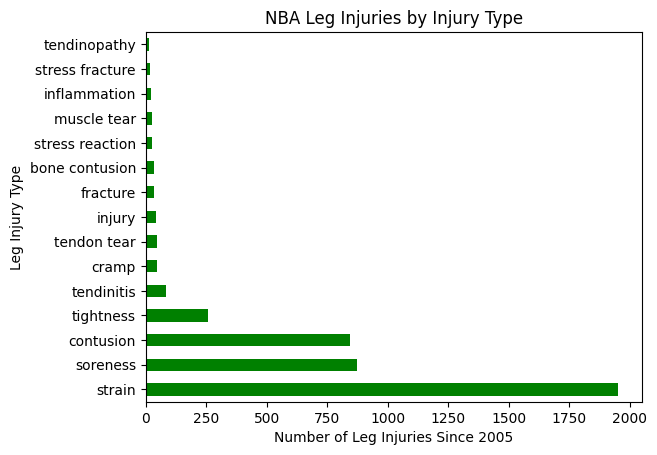

In [107]:
NA_leg_injury_bar = NA_leg_injury_count_filtered.plot.barh(color='g')  
plt.title("NBA Leg Injuries by Injury Type")
plt.xlabel("Number of Leg Injuries Since 2005")
plt.ylabel("Leg Injury Type")
plt.show()

In [108]:
NA_knee_injury_df = NA_injury_df[NA_injury_df["Body Part"].str.contains("knee")==True]

NA_knee_injury_count = NA_knee_injury_df["Injury Type"].value_counts()

NA_total_knee_injury = NA_knee_injury_count.sum()
NA_knee_injury_limit = 0.0025 * NA_total_knee_injury

NA_knee_injury_count_filtered = NA_knee_injury_count[NA_knee_injury_count>NA_knee_injury_limit]
NA_knee_injury_count_filtered

Injury Type
soreness          1546
contusion          694
sprain             365
tendinitis         285
bone contusion     159
cartilage tear     141
hyperextension     101
effusion           100
strain              88
ligament tear       80
inflammation        78
debridement         64
injury              63
recovery            41
tendinopathy        38
surgery             30
swelling            23
tendon tear         21
fracture            15
Name: count, dtype: int64

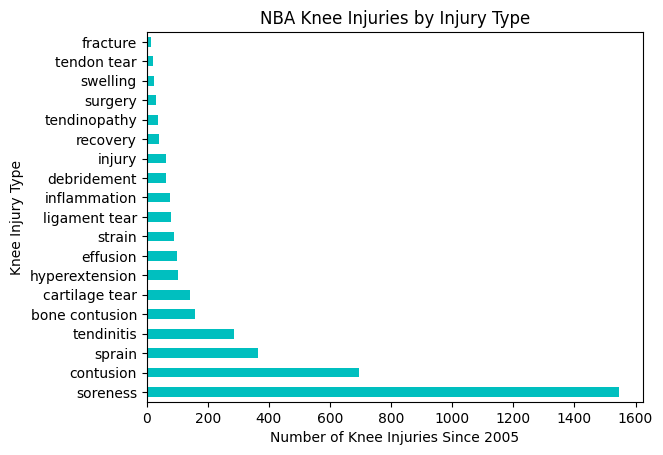

In [109]:
NA_knee_injury_bar = NA_knee_injury_count_filtered.plot.barh(color='c')  
plt.title("NBA Knee Injuries by Injury Type")
plt.xlabel("Number of Knee Injuries Since 2005")
plt.ylabel("Knee Injury Type")
plt.show()

In [114]:
NA_injury_df['Body Part + Injury Type'] = NA_injury_df['Body Part'].astype(str) + " " + NA_injury_df['Injury Type']
NA_specific_injury_df = NA_injury_df[NA_injury_df["Injury Type"].str.contains("illness")==False]
NA_specific_injury_df.head()

,Side,Body Part,Part Specific,Injury Type,Body Part + Injury Type
0,NaN,head,jaw,fracture,head fracture
2,R,knee,NaN,soreness,knee soreness
3,R,knee,NaN,effusion,knee effusion
4,R,knee,NaN,debridement,knee debridement
5,R,hip,NaN,contusion,hip contusion


In [115]:
NA_specific_injury_count = NA_specific_injury_df["Body Part + Injury Type"].value_counts()
NA_specific_injury_count

Body Part + Injury Type
ankle sprain         3690
leg strain           1951
knee soreness        1546
leg soreness          871
leg contusion         845
                     ... 
back cyst               1
hip tendinitis          1
hip arthritis           1
elbow bone injury       1
leg tendonopathy        1
Name: count, Length: 433, dtype: int64

In [118]:
NA_total_specific_injury = NA_specific_injury_count.sum()
NA_specific_injury_limit = 0.01 * NA_total_specific_injury

NA_specific_injury_count_filtered = NA_specific_injury_count[NA_specific_injury_count>NA_specific_injury_limit]
NA_specific_injury_count_filtered

Body Part + Injury Type
ankle sprain         3690
leg strain           1951
knee soreness        1546
leg soreness          871
leg contusion         845
knee contusion        694
ankle soreness        686
back spasms           625
back soreness         605
foot soreness         568
hand sprain           509
foot sprain           395
knee sprain           365
head concussion       363
head laceration       351
wrist sprain          298
knee tendinitis       285
back strain           261
leg tightness         256
shoulder soreness     255
hip soreness          245
hip contusion         236
Name: count, dtype: int64

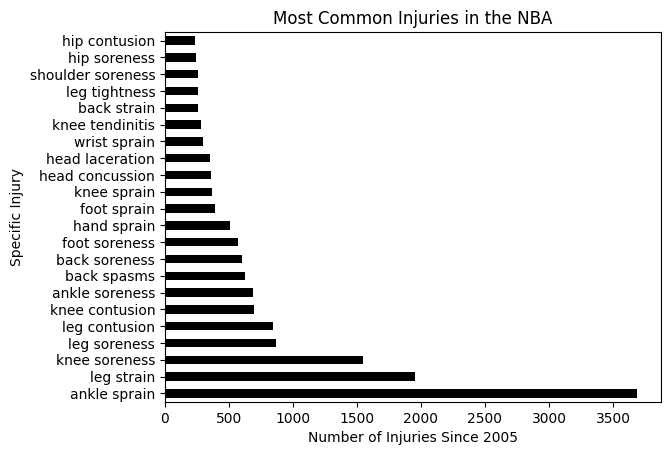

In [119]:
NA_specific_injury_bar = NA_specific_injury_count_filtered.plot.barh(color='k')  
plt.title("Most Common Injuries in the NBA")
plt.xlabel("Number of Injuries Since 2005")
plt.ylabel("Specific Injury")
plt.show()

In [121]:
NA_side_injury_count = NA_injury_df["Side"].value_counts()
NA_side_injury_count

Side
R    8997
L    8987
B     180
        2
Name: count, dtype: int64